# Full Evaluation of Simulations
This notebook contains the full evaluation of all performed simulations.
1. The optimization results are loaded for the different configurations. FXX corresponds to a scheduler step length of XX minutes. GTXX corresponds to a ground-truth data resolution of XX minutes.
2. The results are evaluated based on performance. Relative Performance, Shrinkage and other metrics are calculated.
3. The results are visualized. All result-plots in the paper are produced via this file.

In [1]:
import sys
import os
# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..')) 

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math
import hashlib

from evaluation.evaluator import Evaluator
from evaluation.multi_run_evaluator import MultiRunEvaluator

## 1 - Load Optimization Results and calculate costs

### Scheduler-Step Length: 60 min

In [2]:
time_of_executions = ["2025-08-29_11-24", "2025-09-16_13-22"]  # f60-gt60-c8

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt60_c8 = MultiRunEvaluator(run_paths=csvs)
mref60_gt60_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1191.19,250.77,1149.04,123.78,2085.02,1039.20,87.29,10.08,126.99,125.01,212.31,1.0
1,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,496.66,41.72,0.32,201.11,201.05,242.77,2.2
2,mpc_det_rule_constGrid,15,15,60.0,1304.44,298.72,1262.46,138.74,2162.35,1078.74,90.61,8.35,159.98,158.35,248.96,2.8


In [3]:
time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt1_c8 = MultiRunEvaluator(run_paths=csvs)
mref60_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,60.0,1207.75,256.79,1153.98,124.28,2664.88,1329.11,111.65,9.99,132.51,130.55,242.19,1.2
1,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,49.32,0.31,202.39,202.33,251.65,1.8
2,mpc_det_rule_constGrid,15,15,60.0,1318.83,303.31,1266.00,139.08,2700.87,1347.95,113.23,8.33,164.23,162.60,275.83,3.0
3,ideal,15,15,60.0,1671.39,404.92,1629.33,181.42,2085.08,1039.26,87.30,10.00,223.50,221.54,308.83,4.0


### Scheduler-Step Length: 30 min

In [4]:
time_of_executions = ["2025-09-26_10-10"]  # f30-gt30-c8

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt30_c8 = MultiRunEvaluator(run_paths=csvs)
mref30_gt30_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1192.76,251.40,1149.64,124.13,2137.81,1065.63,89.51,9.99,127.27,125.31,214.83,1.0
1,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,523.20,43.95,0.32,201.38,201.32,245.27,2.2
2,mpc_det_rule_constGrid,15,15,30.0,1291.19,295.27,1247.55,135.98,2261.91,1128.68,94.81,8.00,159.29,157.72,252.53,2.8


In [5]:
time_of_executions = ["2025-09-26_10-13", "2025-09-26_10-14"]  # f30-gt1-c8

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt1_c8 = MultiRunEvaluator(run_paths=csvs)
mref30_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1202.98,255.36,1150.83,124.25,2584.13,1288.74,108.25,10.00,131.10,129.14,237.40,1.13
1,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,49.32,0.31,202.39,202.33,251.65,1.87
2,mpc_det_rule_constGrid,15,15,30.0,1300.82,298.40,1248.83,136.09,2677.10,1336.25,112.25,7.97,162.31,160.75,272.99,3.07
3,ideal,15,15,30.0,1583.96,377.07,1540.85,171.06,2137.36,1065.41,89.49,9.99,206.01,204.05,293.54,3.93


### Scheduler-Step Length: 15 min

In [6]:
time_of_executions = ["2025-09-27_08-03", "2025-09-27_08-06"]  # f15-gt15-c8

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt15_c8 = MultiRunEvaluator(run_paths=csvs)
mref15_gt15_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1193.69,251.88,1149.59,124.29,2186.58,1090.02,91.56,9.98,127.59,125.63,217.19,1.00
1,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,547.49,45.99,0.31,201.71,201.65,247.64,2.13
2,mpc_det_rule_constGrid,15,15,15.0,1289.26,294.92,1243.67,135.10,2372.05,1183.89,99.45,7.72,159.82,158.30,257.75,2.87


In [7]:
time_of_executions = ["2025-09-28_11-37", "2025-09-28_11-41", "2025-09-29_14-46", "2025-09-29_14-47"]  # f15-gt1-c8  # 

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt1_c8 = MultiRunEvaluator(run_paths=csvs)
mref15_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1199.80,254.38,1149.56,124.28,2491.16,1242.28,104.35,9.97,130.09,128.14,232.49,1.00
1,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,49.32,0.31,202.39,202.33,251.65,2.13
2,mpc_det_rule_constGrid,15,15,15.0,1294.77,296.78,1243.67,135.08,2646.94,1321.32,110.99,7.68,161.71,160.20,271.19,3.27
3,ideal,15,15,15.0,1472.98,341.53,1428.90,157.74,2186.51,1089.99,91.56,9.96,183.79,181.84,273.40,3.60


In [8]:
# More detailed outputs, e.g.,
#mref30_gt30_c8.leaderboard()
#mref30_gt30_c8.pivot(models=["ideal", "rule-based", "mpc_det_rule_constGrid"])
#mref30_gt30_c8.failure_table()

## 2 - Calculate Metrics

In [9]:
# Load all needed data into one big dataframe
cols_in_paper = ['model', 'e_import_total', 'import_cost', 'e_export_total', 'export_revenue', 'e_discharged_total', 'e_battery_deg_costs', 'net_cost_adj', 'net_cost_final']

# Get the rows for 'ideal' model as Series
ideal_60_gt60 = mref60_gt60_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_60_gt1 = mref60_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_30_gt30 = mref30_gt30_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_30_gt1 = mref30_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_15_gt15 = mref15_gt15_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_15_gt1 = mref15_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']

rb_60_gt60 = mref60_gt60_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']
rb_60_gt1 = mref60_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']
rb_30_gt30 = mref30_gt30_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']
rb_30_gt1 = mref30_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']
rb_15_gt15 = mref15_gt15_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']
rb_15_gt1 = mref15_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['rule-based']

real_60_gt60 = mref60_gt60_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']
real_60_gt1 = mref60_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']
real_30_gt30 = mref30_gt30_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']
real_30_gt1 = mref30_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']
real_15_gt15 = mref15_gt15_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']
real_15_gt1 = mref15_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['mpc_det_rule_constGrid']

ideal_GRID_60_gt60 = mref60_gt60_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_GRID_60_gt1 = mref60_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal_rule_constGrid']
ideal_GRID_30_gt30 = mref30_gt30_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_GRID_30_gt1 = mref30_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal_rule_constGrid']
ideal_GRID_15_gt15 = mref15_gt15_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal']
ideal_GRID_15_gt1 = mref15_gt1_c8.leaderboard_mean()[cols_in_paper].set_index('model').loc['ideal_rule_constGrid']


# Combine into a DataFrame
df_big_mean = pd.DataFrame({
    'ideal_f60-gt60-c8': ideal_60_gt60,
    'ideal_f60-gt1-c8': ideal_60_gt1, 
    'ideal_f30-gt30-c8': ideal_30_gt30,
    'ideal_f30-gt1-c8': ideal_30_gt1,
    'ideal_f15-gt15-c8': ideal_15_gt15,
    'ideal_f15-gt1-c8': ideal_15_gt1, 
    'rb_f60-gt60-c8': rb_60_gt60,
    'rb_f60-gt1-c8': rb_60_gt1,
    'rb_f30-gt30-c8': rb_30_gt30,
    'rb_f30-gt1-c8': rb_30_gt1,
    'rb_f15-gt15-c8': rb_15_gt15,
    'rb_f15-gt1-c8': rb_15_gt1,
    'real_f60-gt60-c8': real_60_gt60,
    'real_f60-gt1-c8': real_60_gt1,
    'real_f30-gt30-c8': real_30_gt30,
    'real_f30-gt1-c8': real_30_gt1,
    'real_f15-gt15-c8': real_15_gt15,
    'real_f15-gt1-c8': real_15_gt1,
    'idealGRID_f60-gt60-c8': ideal_GRID_60_gt60,
    'idealGRID_f60-gt1-c8': ideal_GRID_60_gt1,
    'idealGRID_f30-gt30-c8': ideal_GRID_30_gt30,
    'idealGRID_f30-gt1-c8': ideal_GRID_30_gt1,
    'idealGRID_f15-gt15-c8': ideal_GRID_15_gt15,
    'idealGRID_f15-gt1-c8': ideal_GRID_15_gt1
}).T

df_big_mean

# Now compute relative improvements of net_cost_final when compared to rule-based
# go through each row and compute the relative improvement based on the rule-based value on another row with the same suffix
def compute_relative_improvement(row, reference_df):
    model_name = row.name
    if 'rb_' in model_name:
        return np.nan  # No improvement over itself
    suffix = model_name.split('_', 1)[1]  # Get the part after the first underscore
    rb_model_name = f'rb_{suffix}'
    if rb_model_name in reference_df.index:
        rb_value = reference_df.at[rb_model_name, 'net_cost_final']
        if rb_value == 0:
            return np.nan  # Avoid division by zero
        return round((rb_value - row['net_cost_final']) / abs(rb_value) * 100, 2)  # Relative improvement in percentage
    else:
        print("Hi")
        return np.nan  # Reference model not found

rel_impr = df_big_mean.apply(lambda row: compute_relative_improvement(row, df_big_mean), axis=1)
rel_impr.name = 'rel_imp_net_cost_final_vs_rb'
rel_impr

ideal_f60-gt60-c8        12.55
ideal_f60-gt1-c8        -22.72
ideal_f30-gt30-c8        12.41
ideal_f30-gt1-c8        -16.65
ideal_f15-gt15-c8        12.30
ideal_f15-gt1-c8         -8.64
rb_f60-gt60-c8             NaN
rb_f60-gt1-c8              NaN
rb_f30-gt30-c8             NaN
rb_f30-gt1-c8              NaN
rb_f15-gt15-c8             NaN
rb_f15-gt1-c8              NaN
real_f60-gt60-c8         -2.55
real_f60-gt1-c8          -9.61
real_f30-gt30-c8         -2.96
real_f30-gt1-c8          -8.48
real_f15-gt15-c8         -4.08
real_f15-gt1-c8          -7.76
idealGRID_f60-gt60-c8    12.55
idealGRID_f60-gt1-c8      3.76
idealGRID_f30-gt30-c8    12.41
idealGRID_f30-gt1-c8      5.66
idealGRID_f15-gt15-c8    12.30
idealGRID_f15-gt1-c8      7.61
Name: rel_imp_net_cost_final_vs_rb, dtype: float64

### Latex Tables & Ranking

In [10]:
cols_in_paper = ['model', 'e_import_total', 'import_cost', 'e_export_total', 'export_revenue', 'e_discharged_total', 'e_battery_deg_costs', 'net_cost_adj', 'net_cost_final', 'avg_rank']

def get_latex_table(mre, caption, filename):
    latex_table = mre.leaderboard_mean()[cols_in_paper].to_latex(index=False,float_format="%.2f", caption=caption)
    with open(f"tables/{filename}_fixedEval.txt", "w") as f:
        f.write(latex_table)

#get_latex_table(mref60_gt60_c8, "f60-gt60-c8", "latex_table_f60-gt60-c8")
#get_latex_table(mref60_gt1_c8, "f60-gt1-c8", "latex_table_f60-gt1-c8")
#get_latex_table(mref30_gt30_c8, "f30-gt30-c8", "latex_table_f30-gt30-c8")
#get_latex_table(mref30_gt1_c8, "f30-gt1-c8", "latex_table_f30-gt1-c8")
#get_latex_table(mref15_gt15_c8, "f15-gt15-c8", "latex_table_f15-gt15-c8")
#get_latex_table(mref15_gt1_c8, "f15-gt1-c8", "latex_table_f15-gt1-c8")

In [11]:
def get_ranking(mre, models, value="net_cost_final"):
    pvt = mre.pivot(models=models, value=value)
    
    ranks = pvt.rank(axis=1, ascending=True, method='min').astype(int).add_suffix('_rank')
    return pd.concat([pvt, ranks], axis=1)

rank_f60_gt60_c8 = get_ranking(mref60_gt60_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])
rank_f30_gt30_c8 = get_ranking(mref30_gt30_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])
rank_f15_gt15_c8 = get_ranking(mref15_gt15_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])

print("Ranking f60-gt60-c8 Mean Ranks: ", rank_f60_gt60_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f30-gt30-c8 Mean Ranks: ", rank_f30_gt30_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f15-gt15-c8 Mean Ranks: ", rank_f15_gt15_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())

print("\n\n")

rank_f60_gt1_c8 = get_ranking(mref60_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])
rank_f30_gt1_c8 = get_ranking(mref30_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])
rank_f15_gt1_c8 = get_ranking(mref15_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])

print("Ranking f60-gt1-c8 Mean Ranks: ", rank_f60_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f30-gt1-c8 Mean Ranks: ", rank_f30_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f15-gt1-c8 Mean Ranks: ", rank_f15_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())

Ranking f60-gt60-c8 Mean Ranks:  {('ideal_rank', '60_rank'): 1.0, ('rule-based_rank', '60_rank'): 2.2, ('mpc_det_rule_constGrid_rank', '60_rank'): 2.8}
Ranking f30-gt30-c8 Mean Ranks:  {('ideal_rank', '30_rank'): 1.0, ('rule-based_rank', '30_rank'): 2.2, ('mpc_det_rule_constGrid_rank', '30_rank'): 2.8}
Ranking f15-gt15-c8 Mean Ranks:  {('ideal_rank', '15_rank'): 1.0, ('rule-based_rank', '15_rank'): 2.1333333333333333, ('mpc_det_rule_constGrid_rank', '15_rank'): 2.8666666666666667}



Ranking f60-gt1-c8 Mean Ranks:  {('ideal_rank', '60_rank'): 4.0, ('ideal_rule_constGrid_rank', '60_rank'): 1.2, ('rule-based_rank', '60_rank'): 1.8, ('mpc_det_rule_constGrid_rank', '60_rank'): 3.0}
Ranking f30-gt1-c8 Mean Ranks:  {('ideal_rank', '30_rank'): 3.933333333333333, ('ideal_rule_constGrid_rank', '30_rank'): 1.1333333333333333, ('rule-based_rank', '30_rank'): 1.8666666666666667, ('mpc_det_rule_constGrid_rank', '30_rank'): 3.066666666666667}
Ranking f15-gt1-c8 Mean Ranks:  {('ideal_rank', '15_rank'

### Shrinkage

In [12]:
def get_diff(mre, freq: int, models= ["rule-based", "ideal"], value: str = "net_cost_final") -> pd.DataFrame:
    df = mre.pivot(models=models, value=value)
    df['diff'] = df[(models[0], freq)] - df[(models[1], freq)]

    # Sort according to the index which is SFH number
    df = df.sort_index(key=lambda x: x.map(lambda y: int(re.search(r"SFH(\d+)", y).group(1))))

    return df
print("Comparison of Costs RB - to Ideal-ConstGrid\n")

diff_f60_gt60_c8 = get_diff(mref60_gt60_c8, freq=60)
diff_f60_gt1_c8  = get_diff(mref60_gt1_c8, freq=60, models=['rule-based', 'ideal_rule_constGrid'])
diff_f30_gt30_c8 = get_diff(mref30_gt30_c8, freq=30)
diff_f30_gt1_c8  = get_diff(mref30_gt1_c8, freq=30, models=['rule-based', 'ideal_rule_constGrid'])
diff_f15_gt15_c8 = get_diff(mref15_gt15_c8, freq=15)
diff_f15_gt1_c8  = get_diff(mref15_gt1_c8, freq=15, models=['rule-based', 'ideal_rule_constGrid'])

print("f60-gt60-c8: ", diff_f60_gt60_c8['diff'].mean())
print("f60-gt1-c8:  ", diff_f60_gt1_c8['diff'].mean())
print("f30-gt30-c8: ", diff_f30_gt30_c8['diff'].mean())
print("f30-gt1-c8:  ", diff_f30_gt1_c8['diff'].mean())
print("f15-gt15-c8: ", diff_f15_gt15_c8['diff'].mean())
print("f15-gt1-c8:  ", diff_f15_gt1_c8['diff'].mean())


Comparison of Costs RB - to Ideal-ConstGrid

f60-gt60-c8:  30.461119297704283
f60-gt1-c8:   9.456103234393078
f30-gt30-c8:  30.44098038794771
f30-gt1-c8:   14.25259529695859
f15-gt15-c8:  30.44703578983789
f15-gt1-c8:   19.159098025864033


In [13]:
# get the underestimation of the savings when using a coarser forecast resolution
def get_underestimation(mre_gt60, mre_gt1, models, value="net_cost_final"):
    gt_60 = mre_gt60.pivot(models=models, value=value).mean()
    gt_1 = mre_gt1.pivot(models=models, value=value).mean()

    underestimations = {}
    for m in models:
        m1=m
        m60=m
        if m == "ideal_rule_constGrid":
            m60="ideal"
        underestimation = (gt_1[m1] - gt_60[m60]) / gt_60[m60]
        underestimations[m] = underestimation.values * 100  # in percent
    return pd.DataFrame.from_dict(underestimations, orient="index", columns=["underestimation"])

models = ["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"]
print("\nUnderestimation f60: \n", get_underestimation(mref60_gt60_c8, mref60_gt1_c8, models=models))
print("\nUnderestimation f30: \n", get_underestimation(mref30_gt30_c8, mref30_gt1_c8, models=models))
print("\nUnderestimation f15: \n", get_underestimation(mref15_gt15_c8, mref15_gt1_c8, models=models))  # ideal not yet available


Underestimation f60: 
                         underestimation
ideal                         45.467142
ideal_rule_constGrid          14.078222
rule-based                     3.659392
mpc_det_rule_constGrid        10.790619

Underestimation f30: 
                         underestimation
ideal                         36.641895
ideal_rule_constGrid          10.507059
rule-based                     2.602663
mpc_det_rule_constGrid         8.104959

Underestimation f15: 
                         underestimation
ideal                         25.878300
ideal_rule_constGrid           7.042858
rule-based                     1.618770
mpc_det_rule_constGrid         5.216164


In [14]:
# get the differences between diff_f60_gt60_c8['diff'] and diff_f60_gt1_c8['diff']
full_values_df = pd.DataFrame({
    'ideal_f60-gt60-c8': diff_f60_gt60_c8['ideal'][60],
    'rb_f60-gt60-c8': diff_f60_gt60_c8['rule-based'][60],
    'ideal_f60-gt1-c8': diff_f60_gt1_c8['ideal_rule_constGrid'][60],
    'rb_f60-gt1-c8': diff_f60_gt1_c8['rule-based'][60],
    'ideal_f30-gt30-c8': diff_f30_gt30_c8['ideal'][30],
    'rb_f30-gt30-c8': diff_f30_gt30_c8['rule-based'][30],
    'ideal_f30-gt1-c8': diff_f30_gt1_c8['ideal_rule_constGrid'][30],
    'rb_f30-gt1-c8': diff_f30_gt1_c8['rule-based'][30],
    'ideal_f15-gt15-c8': diff_f15_gt15_c8['ideal'][15],
    'rb_f15-gt15-c8': diff_f15_gt15_c8['rule-based'][15],
    'ideal_f15-gt1-c8': diff_f15_gt1_c8['ideal_rule_constGrid'][15],
    'rb_f15-gt1-c8': diff_f15_gt1_c8['rule-based'][15],
    # 'real_f60-gt60-c8': diff_f60_gt60_c8['mpc_det_rule_constGrid'][60],
    # 'real_f60-gt1-c8': diff_f60_gt1_c8['mpc_det_rule_constGrid'][60],
    # 'real_f30-gt30-c8': diff_f30_gt30_c8['mpc_det_rule_constGrid'][30],
    # 'real_f30-gt1-c8': diff_f30_gt1_c8['mpc_det_rule_constGrid'][30],
    # 'real_f15-gt15-c8': diff_f15_gt15_c8['mpc_det_rule_constGrid'][15],
    # 'real_f15-gt1-c8': diff_f15_gt1_c8['mpc_det_rule_constGrid'][15]
    
})

comparison_df = pd.DataFrame({
    'diff_f60-gt60-c8': diff_f60_gt60_c8['diff'],
    'diff_f60-gt1-c8': diff_f60_gt1_c8['diff'],
    'diff_f30-gt30-c8': diff_f30_gt30_c8['diff'],
    'diff_f30-gt1-c8': diff_f30_gt1_c8['diff'],
    'diff_f15-gt15-c8': diff_f15_gt15_c8['diff'],
    'diff_f15-gt1-c8': diff_f15_gt1_c8['diff']
})

# Here, results are average of multiple buildings (in paper, focus was on the performance of an average building)

# OVERSTATEMENTS [€]
comparison_df['Overstatement_60'] = comparison_df['diff_f60-gt60-c8'] - comparison_df['diff_f60-gt1-c8']
comparison_df['Overstatement_30'] = comparison_df['diff_f30-gt30-c8'] - comparison_df['diff_f30-gt1-c8']
comparison_df['Overstatement_15'] = comparison_df['diff_f15-gt15-c8'] - comparison_df['diff_f15-gt1-c8']

# SHRINKAGE [-]
comparison_df['shrinkage_60'] = 1 -   comparison_df['diff_f60-gt1-c8'] / comparison_df['diff_f60-gt60-c8']  # Aka how much of the predicted benefit is lost. a=25% => 25% of the predicted benefit is lost. a>100 => Reversal of sign, more than 100% of predicted edge disappears (i.e. other evaluation would have picked wrong winner.)
comparison_df['shrinkage_30'] = 1 -   comparison_df['diff_f30-gt1-c8'] / comparison_df['diff_f30-gt30-c8']
comparison_df['shrinkage_15'] = 1 -   comparison_df['diff_f15-gt1-c8'] / comparison_df['diff_f15-gt15-c8']


# RELATIVE IMPROVEMENTS [-]
comparison_df['rel_gt60_improv_60'] = comparison_df['diff_f60-gt60-c8'] / full_values_df['rb_f60-gt60-c8']
comparison_df['rel_gt1_improv_60'] = comparison_df['diff_f60-gt1-c8'] / full_values_df['rb_f60-gt1-c8']
comparison_df['rel_gt30_improv_30'] = comparison_df['diff_f30-gt30-c8'] / full_values_df['rb_f30-gt30-c8']
comparison_df['rel_gt1_improv_30'] = comparison_df['diff_f30-gt1-c8'] / full_values_df['rb_f30-gt1-c8']
comparison_df['rel_gt15_improv_15'] = comparison_df['diff_f15-gt15-c8'] / full_values_df['rb_f15-gt15-c8']
comparison_df['rel_gt1_improv_15'] = comparison_df['diff_f15-gt1-c8'] / full_values_df['rb_f15-gt1-c8']

comparison_df['rel_improv_diff_60'] = comparison_df['rel_gt60_improv_60'] - comparison_df['rel_gt1_improv_60']
comparison_df['rel_improv_diff_30'] = comparison_df['rel_gt30_improv_30'] - comparison_df['rel_gt1_improv_30']
comparison_df['rel_improv_diff_15'] = comparison_df['rel_gt15_improv_15'] - comparison_df['rel_gt1_improv_15']


In [15]:
# Get Shrinkage of an average building
num_60 = comparison_df['diff_f60-gt1-c8'].mean()
den_60 = comparison_df['diff_f60-gt60-c8'].mean()
num_30 = comparison_df['diff_f30-gt1-c8'].mean()
den_30 = comparison_df['diff_f30-gt30-c8'].mean()
num_15 = comparison_df['diff_f15-gt1-c8'].mean()
den_15 = comparison_df['diff_f15-gt15-c8'].mean()

shrinkage_60 = 1 - num_60 / den_60
shrinkage_30 = 1 - num_30 / den_30
shrinkage_15 = 1 - num_15 / den_15

shrinkage_df_mean = pd.DataFrame([{
    'shrinkage_60': shrinkage_60,
    'shrinkage_30': shrinkage_30,
    'shrinkage_15': shrinkage_15,

}])

shrinkage_df_mean

,shrinkage_60,shrinkage_30,shrinkage_15
0,0.689568,0.531796,0.37074


In [16]:
# Relative Improvement based on means
# mean of RBC - mean of method / mean of RBC
means = full_values_df.mean()
rel_imp_60_60 = (means['rb_f60-gt60-c8'] - means['ideal_f60-gt60-c8']) / means['rb_f60-gt60-c8']
rel_imp_30_30 = (means['rb_f30-gt30-c8'] - means['ideal_f30-gt30-c8']) / means['rb_f30-gt30-c8']
rel_imp_15_15 = (means['rb_f15-gt15-c8'] - means['ideal_f15-gt15-c8']) / means['rb_f15-gt15-c8']
rel_imp_60_1 = (means['rb_f60-gt1-c8'] - means['ideal_f60-gt1-c8']) / means['rb_f60-gt1-c8']
rel_imp_30_1 = (means['rb_f30-gt1-c8'] - means['ideal_f30-gt1-c8']) / means['rb_f30-gt1-c8']
rel_imp_15_1 = (means['rb_f15-gt1-c8'] - means['ideal_f15-gt1-c8']) / means['rb_f15-gt1-c8']

df_rel_imp_means = pd.DataFrame([{
    'rel_imp_60_60': rel_imp_60_60,
    'rel_imp_30_30': rel_imp_30_30,
    'rel_imp_15_15': rel_imp_15_15,
    'rel_imp_60_1': rel_imp_60_1,
    'rel_imp_30_1': rel_imp_30_1,
    'rel_imp_15_1': rel_imp_15_1
}])
df_rel_imp_means


,rel_imp_60_60,rel_imp_30_30,rel_imp_15_15,rel_imp_60_1,rel_imp_30_1,rel_imp_15_1
0,0.125475,0.124114,0.122948,0.037576,0.056637,0.076134


In [17]:
comparison_df.mean()

diff_f60-gt60-c8      30.461119
diff_f60-gt1-c8        9.456103
diff_f30-gt30-c8      30.440980
diff_f30-gt1-c8       14.252595
diff_f15-gt15-c8      30.447036
diff_f15-gt1-c8       19.159098
Overstatement_60      21.005016
Overstatement_30      16.188385
Overstatement_15      11.287938
shrinkage_60           0.748757
shrinkage_30           0.584467
shrinkage_15           0.415833
rel_gt60_improv_60     0.146703
rel_gt1_improv_60      0.027670
rel_gt30_improv_30     0.144723
rel_gt1_improv_30      0.051556
rel_gt15_improv_15     0.142845
rel_gt1_improv_15      0.077224
rel_improv_diff_60     0.119033
rel_improv_diff_30     0.093167
rel_improv_diff_15     0.065622
dtype: float64

In [18]:
full_values_df.mean()

ideal_f60-gt60-c8    212.305108
rb_f60-gt60-c8       242.766227
ideal_f60-gt1-c8     242.193892
rb_f60-gt1-c8        251.649996
ideal_f30-gt30-c8    214.825553
rb_f30-gt30-c8       245.266534
ideal_f30-gt1-c8     237.397400
rb_f30-gt1-c8        251.649996
ideal_f15-gt15-c8    217.194217
rb_f15-gt15-c8       247.641253
ideal_f15-gt1-c8     232.490898
rb_f15-gt1-c8        251.649996
dtype: float64

## 3 - Plots

In [19]:
model_colors = {
    "ideal":                   "#9467bd",
    "ideal_rule":              "#8c564b",
    "mpc_det_rule":            "#2ca02c",
    "mpc_det_rule_constGrid":  "#17becf",
    "rule-based":              "#ff7f0e",
    "ideal_rule_constGrid":    "#1f77b4",
}

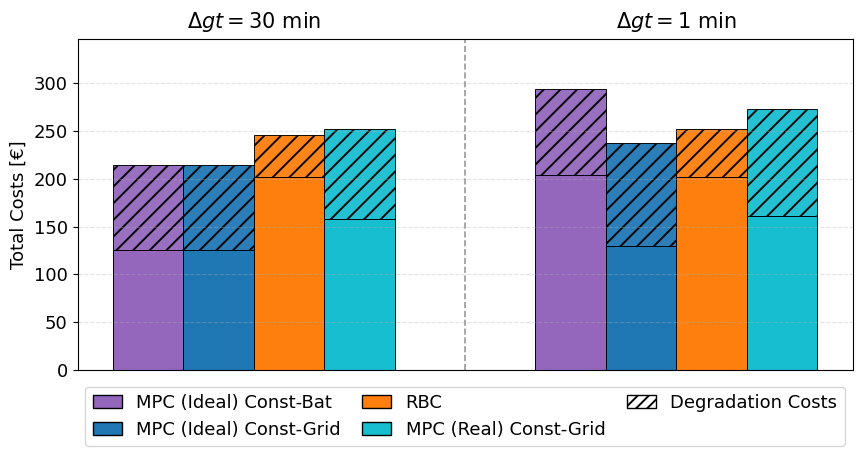

In [20]:
def plot_split_stacked_costs(
    df_left: pd.DataFrame,
    df_right: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    left_title="Dataset A",
    right_title="Dataset B",
    figsize=(10, 4.8),
    block_gap=1.0,                   # gap between LEFT and RIGHT blocks only
):
    # Use model as index
    L = df_left.set_index("model")
    R = df_right.set_index("model")

    # If ideal_rule_constGrid is missing, clone from ideal (for BOTH frames if possible)
    if "ideal_rule_constGrid" in models_to_plot:
        if ("ideal_rule_constGrid" not in L.index) and ("ideal" in L.index):
            L.loc["ideal_rule_constGrid"] = L.loc["ideal"]
        if ("ideal_rule_constGrid" not in R.index) and ("ideal" in R.index):
            R.loc["ideal_rule_constGrid"] = R.loc["ideal"]

    # Ensure all models exist in both frames
    missing = [m for m in models_to_plot if m not in L.index or m not in R.index]
    if missing:
        raise ValueError(f"Model(s) missing in one of the dataframes: {missing}")


    plt.rcParams.update({
        "axes.labelsize": 13,
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,
        "legend.fontsize": 13,
        "hatch.linewidth": 1.4,
    })

    fig, ax = plt.subplots(figsize=figsize)

    n = len(models_to_plot)
    # --- Layout: narrower bars that still TOUCH within each side ---
    width = 0.5                          # bar width
    step  = width                        # center-to-center spacing so bars touch
    x_left  = np.arange(n) * step
    x_right = n * step + block_gap + np.arange(n) * step

    # tight x-limits (no side padding)
    ax.set_xlim(-width/2, x_right[-1] + width/2)
    ax.margins(x=0)

    ymax = 0.0
    # LEFT block
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")
        btm = float(L.loc[m, bottom_col])
        top = float(L.loc[m, top_col])

        ax.bar(x_left[i], btm, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(x_left[i], top,  width, bottom=btm, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)
        ymax = max(ymax, btm + top)

    # RIGHT block
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")
        btm = float(R.loc[m, bottom_col])
        top = float(R.loc[m, top_col])

        ax.bar(x_right[i], btm, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(x_right[i], top,  width, bottom=btm, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)
        ymax = max(ymax, btm + top)

    # # Separator line between blocks
    # sep_x = n - 0.5 + block_gap / 2
    # # fix separator line position to account for bar width
    # sep_x += width / 2

    # separator exactly between the two blocks in data coords
    sep_x = n * step + block_gap / 4
    ax.axvline(sep_x, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)

    # X ticks & labels
    xticks = np.concatenate([x_left, x_right])
    xticklabels = list(models_to_plot) + list(models_to_plot)
    #ax.set_xticks(xticks)
    # set no x ticks
    ax.set_xticks([])

    #ax.set_xticklabels(xticklabels, rotation=0)

    # Tight x-limits so bars have no side padding
    ax.set_xlim(-0.5, x_right[-1] + 0.5)         # CHANGED
    ax.margins(x=0)                               # CHANGED

    # Axis label & grid
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    ax.set_ylim(top=ymax + 0.18 * ymax)
    
   # Legend items
    # Change the name of the models in the legend
    model_legend = {
        "ideal":                   "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid":  "MPC (Real) Const-Grid",
        "rule-based":              "RBC",
        "ideal_rule_constGrid":    "MPC (Ideal) Const-Grid",
    }
    model_patches = [Patch(facecolor=model_colors.get(m, "#777777"),
                           edgecolor="black", label=model_legend.get(m, m)) for m in models_to_plot]
    #comp_elec = None#Patch(facecolor="white", edgecolor="black", label="Electricity Costs")
    comp_deg  = Patch(facecolor="white", edgecolor="black", hatch="///", label="Degradation Costs")
    #handles = model_patches + [comp_elec, comp_deg]
    handles = model_patches + [comp_deg]

    # ---- Legend below, centered in two rows ----
    ncols = math.ceil(len(handles) / 2)
    ax.legend(
        handles=handles,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.05),  # push below axes
        ncol=ncols,
        frameon=True,
        borderaxespad=0.0,
        handlelength=1.6,
        columnspacing=1.2
    )

    # --- Put the left/right titles OUTSIDE the plot area, like a figure title ---
    # Reserve more top margin for the headers:
    fig.subplots_adjust(top=0.8)                 # CHANGED

    # Compute centers in figure fraction and place texts high, like titles
    fig_bb = ax.get_position()
    xmin, xmax = ax.get_xlim()
    to_ax = lambda x: (x - xmin) / (xmax - xmin)

    left_center_fig_x  = fig_bb.x0 + to_ax(x_left.mean())  * fig_bb.width
    right_center_fig_x = fig_bb.x0 + to_ax(x_right.mean()) * fig_bb.width

    title_y = 0.81                                 # CHANGED: “title-like” height
    fig.text(left_center_fig_x,  title_y, left_title,
             ha="center", va="bottom", fontsize=15, fontweight="bold")
    fig.text(right_center_fig_x, title_y, right_title,
             ha="center", va="bottom", fontsize=15, fontweight="bold")

    return fig, ax


fig, ax = plot_split_stacked_costs(
    mref30_gt30_c8.leaderboard_mean(), mref30_gt1_c8.leaderboard_mean(),
    models_to_plot = ("ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"),
    left_title=r"$\Delta gt = 30 \ \text{min}$",
    right_title=r"$\Delta gt = 1 \ \text{min}$",
    block_gap=1.0,
)
#fig.savefig("costs_f30_split_v2.pdf", bbox_inches="tight")
plt.show()

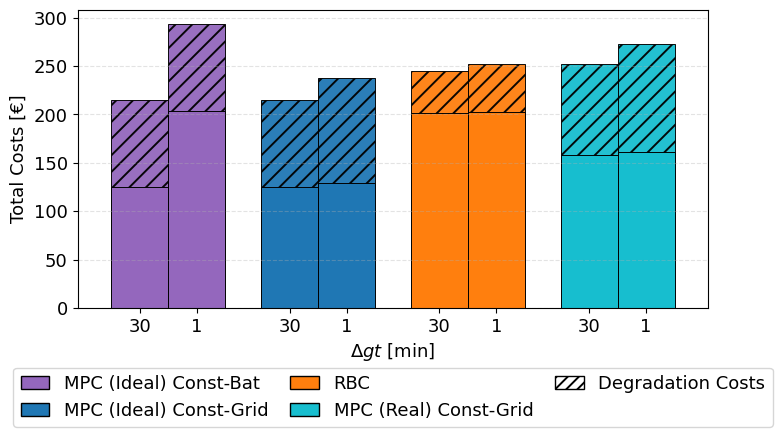

In [21]:
def plot_two_df_stacked_costs(
    df_left: pd.DataFrame,
    df_right: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(8, 6), # 10, 4.5 for right side legend
):
    # Use model as index
    L = df_left.set_index("model").copy()
    R = df_right.set_index("model").copy()

    # If ideal_rule_constGrid is missing, clone from ideal (for BOTH frames if possible)
    if "ideal_rule_constGrid" in models_to_plot:
        if ("ideal_rule_constGrid" not in L.index) and ("ideal" in L.index):
            L.loc["ideal_rule_constGrid"] = L.loc["ideal"]
        if ("ideal_rule_constGrid" not in R.index) and ("ideal" in R.index):
            R.loc["ideal_rule_constGrid"] = R.loc["ideal"]

    # Ensure all models exist in both frames
    missing = [m for m in models_to_plot if m not in L.index or m not in R.index]
    if missing:
        raise ValueError(f"Model(s) missing in one of the dataframes: {missing}")

    # Styling
    plt.rcParams.update({
        "axes.labelsize": 13,
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,
        "legend.fontsize": 13,
        "hatch.linewidth": 1.4,
    })

    n = len(models_to_plot)
    x = np.arange(n, dtype=float)
    width = 0.38
    pos_left  = x - width/2
    pos_right = x + width/2

    fig, ax = plt.subplots(figsize=figsize)

    # Bars
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")

        btm_L = float(L.loc[m, bottom_col]); top_L = float(L.loc[m, top_col])
        ax.bar(pos_left[i],  btm_L, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(pos_left[i],  top_L, width, bottom=btm_L, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)

        btm_R = float(R.loc[m, bottom_col]); top_R = float(R.loc[m, top_col])
        ax.bar(pos_right[i], btm_R, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(pos_right[i], top_R, width, bottom=btm_R, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)

    # One tick per bar: l/r
    ticks   = [p for pair in zip(pos_left, pos_right) for p in pair]
    labels  = [lab for _ in range(n) for lab in ("30", "1")]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    ax.margins(x=0.06)

    # Legend outside right: model colors + hatched degradation item
    # Change the name of the models in the legend
    model_legend = {
        "ideal":                   "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid":  "MPC (Real) Const-Grid",
        "rule-based":              "RBC",
        "ideal_rule_constGrid":    "MPC (Ideal) Const-Grid",
    }

    model_patches = [Patch(facecolor=model_colors.get(m, "#777777"),
                           edgecolor="black", label=model_legend.get(m, m)) for m in models_to_plot]
    deg_patch = Patch(facecolor="white", edgecolor="black", hatch="///",
                      label="Degradation Costs")


    # ---- Legend below, centered in two rows ----
    handles = model_patches + [deg_patch]

    # two rows ⇒ columns = ceil(len(handles)/2)
    import math
    ncols = math.ceil(len(handles) / 2)

    leg = ax.legend(
        handles=handles,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.2),   # push below the axes
        ncol=ncols,
        frameon=True,
        borderaxespad=0.0,
        handlelength=1.6,
        columnspacing=1.2
    )
    leg.get_title().set_multialignment('center')
    # Make room at the bottom for the legend (no right padding needed anymore)
    plt.tight_layout(rect=[0, 0.2, 1, 1])

    ax.set_xlabel(r"$\Delta gt$ [min]")
    return fig, ax
models = ("ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid")

fig, ax = plot_two_df_stacked_costs(mref30_gt30_c8.leaderboard_mean(), mref30_gt1_c8.leaderboard_mean(), models_to_plot=models)
#fig.savefig("costs_f30_v2.pdf", bbox_inches="tight")
plt.show()

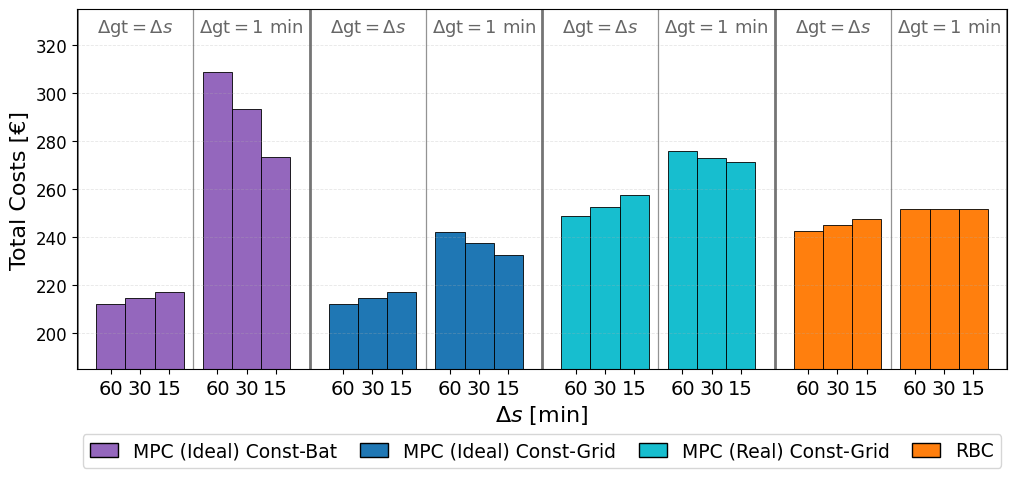

In [22]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_two_groups_per_model_total_costs(
    df_60_60: pd.DataFrame,
    df_60_1: pd.DataFrame,
    df_30_30: pd.DataFrame,
    df_30_1: pd.DataFrame,
    df_15_15: pd.DataFrame,
    df_15_1: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule_constGrid"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(12, 6),
    subgap=0.35,
    model_gap=0.9,
    bar_width=0.26,
    # headers & separators
    f30_header_frac_y=0.92,  # height as FRACTION of y-axis (0..1)
    f30_header_color="#666666",
    f30_left_text=r"$\Delta \mathrm{gt}=\Delta s$",
    f30_right_text=r"$\Delta \mathrm{gt}=1\ \mathrm{min}$",
    inner_sep_color="#666666",
    inner_sep_lw=0.9,
    block_sep_lw=2.0,
):
    # Build lookup dicts
    D = {
        ("60","left"): df_60_60.set_index("model"),
        ("60","right"): df_60_1.set_index("model"),
        ("30","left"): df_30_30.set_index("model"),
        ("30","right"): df_30_1.set_index("model"),
        ("15","left"): df_15_15.set_index("model"),
        ("15","right"): df_15_1.set_index("model"),
    }

    # clone ideal -> ideal_rule_constGrid if requested but missing
    for f in ("60","30","15"):
        for side in ("left","right"):
            df = D[(f,side)]
            if "ideal_rule_constGrid" in models_to_plot:
                if ("ideal_rule_constGrid" not in df.index) and ("ideal" in df.index):
                    df.loc["ideal_rule_constGrid"] = df.loc["ideal"]

    # presence check
    missing = [m for m in models_to_plot
               if any(m not in D[(f,side)].index for f in ("60","30","15") for side in ("left","right"))]
    if missing:
        raise ValueError(f"Model(s) missing in one or more dataframes: {missing}")

    model_colors = {
        "ideal":                   "#9467bd",
        "ideal_rule":              "#8c564b",
        "mpc_det_rule":            "#2ca02c",
        "mpc_det_rule_constGrid":  "#17becf",
        "rule-based":              "#ff7f0e",
        "ideal_rule_constGrid":    "#1f77b4",
    }

    plt.rcParams.update({
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 12,
        "legend.fontsize": 13.5,
        "hatch.linewidth": 1.4,
    })

    fig, ax = plt.subplots(figsize=figsize)

    order = ("60","30","15")

    # layout (bars touch within groups)
    step = bar_width
    group_span = 3 * step
    block_span = group_span + subgap + group_span
    x0 = 0.0

    # positions: list of (x, model, freq, side)
    x_positions = []
    for model in models_to_plot:
        # left mini-group
        for j, f in enumerate(order):
            x_positions.append((x0 + j*step, model, f, "left"))
        # right mini-group
        right_start = x0 + group_span + subgap
        for j, f in enumerate(order):
            x_positions.append((right_start + j*step, model, f, "right"))
        x0 += block_span + model_gap

    # draw bars
    for x, model, f, side in x_positions:
        c = model_colors.get(model, "#777")
        df = D[(f, side)]
        total = float(df.loc[model, bottom_col]) + float(df.loc[model, top_col])
        ax.bar(x, total, bar_width, color=c, edgecolor="black", linewidth=0.6)

    # axes cosmetics (initial)
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.3, linewidth=0.6)
    ax.set_xticks([xp[0] for xp in x_positions])
    ax.set_xticklabels([xp[2] for xp in x_positions])  # "60/30/15"
    ax.set_ylim(185, 335)

    # ---------- per-model x lists (sorted) ----------
    by_model = {m: sorted([x for (x, mm, _, __) in x_positions if mm == m])
                for m in models_to_plot}

    # ---------- Equal-width cells + edge separators ----------
    n_models = len(models_to_plot)

    # Physical width of one model block (6 bars + internal subgap)
    block_width = 6 * bar_width + subgap
    # Each cell span = one block + one model_gap
    W = block_width + model_gap

    # Left edge: align the first block centered in its cell
    first_block_left_edge = by_model[models_to_plot[0]][0] - bar_width / 2
    L = first_block_left_edge - model_gap / 2
    # Right edge: exactly n_models equal cells
    R = L + n_models * W

    # Apply uniform x-limits
    ax.set_xlim(L, R)

    # Draw vertical separators at all cell boundaries incl. the two edges
    x_edges = [L + k * W for k in range(n_models + 1)]
    for x_sep in x_edges:
        ax.axvline(x_sep, color=inner_sep_color, linewidth=block_sep_lw, alpha=0.9)

    # ---------- thin inner separator between the two mini-groups per model ----------
    for model in models_to_plot:
        xs = by_model[model]
        x_mid = 0.5 * (xs[2] + xs[3])
        ax.axvline(x_mid, color=inner_sep_color, linewidth=inner_sep_lw, alpha=0.7)

    # ---------- headers (centered between separators) ----------
    y_min, y_max = ax.get_ylim()
    y_hdr = y_min + f30_header_frac_y * (y_max - y_min)
    header_size = 13

    # For model i, cell is [x_edges[i], x_edges[i+1]]
    # Place left header at midpoint of left half; right header at midpoint of right half.
    for i, _model in enumerate(models_to_plot):
        cell_left  = x_edges[i]
        cell_right = x_edges[i + 1]
        cell_center = 0.5 * (cell_left + cell_right)
        x_left_header  = 0.5 * (cell_left + cell_center)   # center of left half
        x_right_header = 0.5 * (cell_center + cell_right)  # center of right half

        ax.text(x_left_header,  y_hdr, f30_left_text,
                ha="center", va="bottom", fontsize=header_size, color=f30_header_color)
        ax.text(x_right_header, y_hdr, f30_right_text,
                ha="center", va="bottom", fontsize=header_size, color=f30_header_color)

    # legend
    model_legend = {
        "ideal": "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid": "MPC (Real) Const-Grid",
        "rule-based": "RBC",
        "ideal_rule_constGrid": "MPC (Ideal) Const-Grid",
    }
    patches = [Patch(facecolor=model_colors.get(m, "#777"), edgecolor="black",
                     label=model_legend.get(m, m)) for m in models_to_plot]
    ax.legend(handles=patches, loc="upper center", bbox_to_anchor=(0.5, -0.18),
              ncol=4, frameon=True, borderaxespad=0.0, handlelength=1.5, columnspacing=1.2)

    fig.subplots_adjust(bottom=0.28)
    ax.set_xlabel(r"$\Delta s$ [min]")

    return fig, ax
fig, ax = plot_two_groups_per_model_total_costs(
    mref60_gt60_c8.leaderboard_mean(),
    mref60_gt1_c8.leaderboard_mean(),
    mref30_gt30_c8.leaderboard_mean(),
    mref30_gt1_c8.leaderboard_mean(),
    mref15_gt15_c8.leaderboard_mean(),
    mref15_gt1_c8.leaderboard_mean(),
    models_to_plot=("ideal", "ideal_rule_constGrid", "mpc_det_rule_constGrid", "rule-based"),
    bar_width=0.6,
    subgap=0.4,
    model_gap=0.8
)
#fig.savefig("total-costs-all_v2.pdf", bbox_inches="tight")
plt.show()

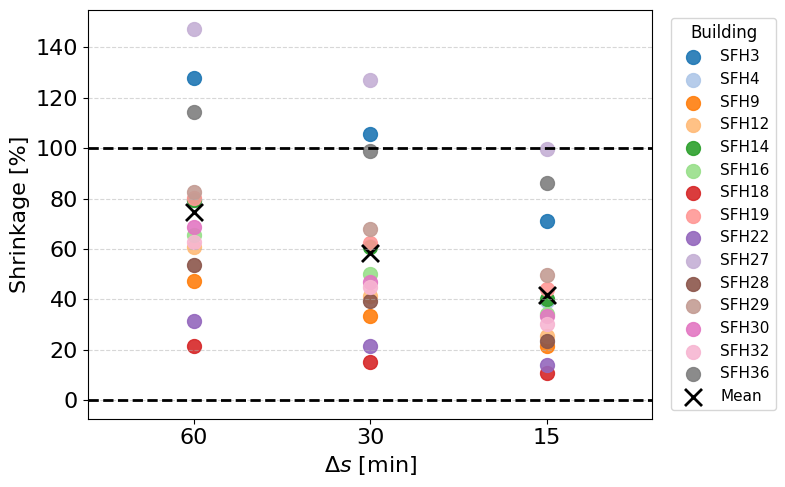

In [23]:
def plot_shrinkage_by_experiment_matplotlib(df: pd.DataFrame,
                                            experiments=(60, 30, 15),
                                            show_summary=True,
                                            summary_stat="median"):
    """
    Matplotlib version: scatter plot of shrinkage vs experiment.
    """
    df_ = df.reset_index().rename(columns={df.index.name or 'index': 'building'})
    rows, order = [], []

    plt.rcParams.update({
        "font.size":            11,
        "axes.labelsize":       16,
        "xtick.labelsize":      16,
        "ytick.labelsize":      16,
        "legend.fontsize":      9,    # labels
        "legend.title_fontsize":10    # title matches labels
    })

    for i, e in enumerate(experiments):
        col = f'shrinkage_{e}'
        if col not in df_.columns:
            continue
        order.append(e)
        base = float(i)
        for _, r in df_.iterrows():
            val = r[col] * 100
            if pd.isna(val):
                continue
            rows.append({
                "x": base ,#+ _stable_jitter(f"{r['building']}|{e}", scale=jitter),
                "x_base": base,
                "experiment": f"{e}-min",
                "building": r["building"],
                "shrinkage": float(val),
            })

    long_df = pd.DataFrame(rows)
    if long_df.empty:
        raise ValueError("No shrinkage_* columns found for the given experiments.")

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(8, 5))

    # Pick a color per building
    buildings = long_df['building'].unique()
    cmap = plt.get_cmap("tab20")
    colors = {b: cmap(i % 20) for i, b in enumerate(buildings)}

    # Scatter for each building
    for b in buildings:
        df_b = long_df[long_df['building'] == b]
        ax.scatter(df_b["x"], df_b["shrinkage"], label=b, color=colors[b], alpha=0.9, s=100)

    # Reference lines
    ax.axhline(0, color="black", linestyle="--", linewidth=2)
    ax.axhline(100, color="black", linestyle="--", linewidth=2)

    # Optional summary
    if show_summary:
        if summary_stat == "median":
            agg = long_df.groupby("x_base")["shrinkage"].median()
            label = "Median"
        else:
            agg = long_df.groupby("x_base")["shrinkage"].mean()
            label = "Mean"
        ax.scatter(agg.index, agg.values,
                   marker="x", color="black", s=150, linewidths=2, label=label)

    # Formatting
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels([f"{e}" for e in order])
    ax.set_xlim(-0.6, len(order)-0.4)
    ax.set_ylabel("Shrinkage [%]")
    ax.set_xlabel(r"$\Delta s$ [min]")
    #ax.set_title("Shrinkage of each building/experiment pair")
    ax.legend(title="Building", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=11, title_fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.5)


    plt.tight_layout()
    return fig, long_df


# --- Usage example ---
fig, tidy = plot_shrinkage_by_experiment_matplotlib(comparison_df, summary_stat="mean")
#fig.savefig("shrinkage_by_experiment_v2.pdf", bbox_inches="tight")
plt.show()


## 4 - Shrinkage with decreasing battery degradation costs

In [8]:
time_of_executions = ["2026-01-31_13-03"]  # f60-gt60-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt60_c4 = MultiRunEvaluator(run_paths=csvs)
mref60_gt60_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1179.81,248.50,1113.34,166.95,3294.82,1644.03,69.05,9.97,81.56,79.60,148.65,1.0
1,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,496.66,20.86,0.32,201.11,201.05,221.91,2.0


In [9]:
time_of_executions = ["2026-01-31_13-12"]  # f60-gt1-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt1_c4 = MultiRunEvaluator(run_paths=csvs)
mref60_gt1_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,60.0,1193.84,253.85,1119.84,167.63,3670.2,1831.71,76.93,9.91,86.22,84.28,161.21,1.0
1,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.7,587.12,24.66,0.31,202.39,202.33,226.99,2.0


In [10]:
time_of_executions = ["2026-01-31_13-17"]  # f60-gt60-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt60_c2 = MultiRunEvaluator(run_paths=csvs)
mref60_gt60_c2.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1179.46,248.42,1113.03,166.91,3295.12,1644.20,34.53,9.93,81.51,79.57,114.09,1.0
1,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,496.66,10.43,0.32,201.11,201.05,211.48,2.0


In [11]:
time_of_executions = ["2026-01-31_13-18"]  # f60-gt1-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt1_c2 = MultiRunEvaluator(run_paths=csvs)
mref60_gt1_c2.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,60.0,1193.75,253.84,1119.59,167.59,3673.7,1833.41,38.50,10.00,86.25,84.29,122.79,1.0
1,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.7,587.12,12.33,0.31,202.39,202.33,214.66,2.0


In [12]:
time_of_executions = ["2026-02-02_08-54"]  # f60-gt60-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt60_c0 = MultiRunEvaluator(run_paths=csvs)
mref60_gt60_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1179.08,248.44,1112.79,166.78,3293.00,1643.19,0.0,9.82,81.66,79.73,79.73,1.0
1,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,496.66,0.0,0.32,201.11,201.05,201.05,2.0


In [13]:
time_of_executions = ["2026-02-02_08-55"]  # f60-gt1-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref60_gt1_c0 = MultiRunEvaluator(run_paths=csvs)
mref60_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,60.0,1192.95,253.70,1118.82,167.37,3678.01,1835.62,0.0,9.90,86.33,84.39,84.39,1.0
1,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,0.0,0.31,202.39,202.33,202.33,2.0


In [14]:
time_of_executions = ["2026-01-31_18-59"]  # f30-gt30-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt30_c4 = MultiRunEvaluator(run_paths=csvs)
mref30_gt30_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1181.40,249.13,1114.07,166.95,3338.25,1665.75,69.96,9.95,82.18,80.23,150.19,1.0
1,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,523.20,21.97,0.32,201.38,201.32,223.29,2.0


In [15]:
time_of_executions = ["2026-01-31_19-00"]  # f30-gt1-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt1_c4 = MultiRunEvaluator(run_paths=csvs)
mref30_gt1_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1190.89,252.91,1117.76,167.33,3626.62,1809.92,76.02,9.92,85.57,83.63,159.64,1.0
1,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,24.66,0.31,202.39,202.33,226.99,2.0


In [16]:
time_of_executions = ["2026-01-31_19-02", "2026-02-01_16-00"]  # f30-gt30-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt30_c2 = MultiRunEvaluator(run_paths=csvs)
mref30_gt30_c2.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1181.28,249.11,1113.96,166.93,3338.13,1665.7,34.98,9.94,82.18,80.23,115.21,1.0
1,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,523.2,10.99,0.32,201.38,201.32,212.30,2.0


In [17]:
time_of_executions = ["2026-01-31_19-03", "2026-02-01_15-58"]  # f30-gt1-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt1_c2 = MultiRunEvaluator(run_paths=csvs)
mref30_gt1_c2.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1190.87,252.92,1117.69,167.32,3630.22,1811.73,38.05,9.91,85.60,83.66,121.70,1.0
1,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,12.33,0.31,202.39,202.33,214.66,2.0


In [18]:
time_of_executions = ["2026-02-02_09-01"]  # f30-gt30-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt30_c0 = MultiRunEvaluator(run_paths=csvs)
mref30_gt30_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1180.42,248.94,1113.14,166.77,3338.64,1665.98,0.0,9.89,82.16,80.23,80.23,1.0
1,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,523.20,0.0,0.32,201.38,201.32,201.32,2.0


In [19]:
time_of_executions = ["2026-02-02_09-03"]  # f30-gt1-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref30_gt1_c0 = MultiRunEvaluator(run_paths=csvs)
mref30_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1189.83,252.70,1116.56,167.12,3637.6,1815.45,0.0,9.84,85.58,83.65,83.65,1.0
1,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.7,587.12,0.0,0.31,202.39,202.33,202.33,2.0


In [20]:
time_of_executions = ["2026-02-01_16-03"]  # f15-gt15-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt15_c4 = MultiRunEvaluator(run_paths=csvs)
mref15_gt15_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.91,249.75,1114.73,166.98,3380.94,1687.10,70.86,9.93,82.76,80.82,151.67,1.0
1,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,547.49,22.99,0.31,201.71,201.65,224.65,2.0


In [21]:
time_of_executions = ["2026-02-03_09-23"]  # f15-gt1-c4

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt1_c4 = MultiRunEvaluator(run_paths=csvs)
mref15_gt1_c4.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1188.83,252.20,1116.85,167.20,3568.69,1780.95,74.80,9.94,85.00,83.05,157.85,1.0
1,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,24.66,0.31,202.39,202.33,226.99,2.0


In [22]:
time_of_executions = ["2026-02-03_09-26"]  # f15-gt15-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt15_c2 = MultiRunEvaluator(run_paths=csvs)
mref15_gt15_c2.leaderboard_mean()


,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.94,249.74,1114.79,166.98,3380.79,1687.04,35.43,9.90,82.76,80.82,116.25,1.0
1,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,547.49,11.50,0.31,201.71,201.65,213.15,2.0


In [23]:
time_of_executions = ["2026-02-03_09-31"]  # f15-gt1-c2

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt1_c2 = MultiRunEvaluator(run_paths=csvs)
mref15_gt1_c2.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1188.73,252.19,1116.73,167.18,3571.79,1782.52,37.43,9.90,85.01,83.07,120.51,1.0
1,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,12.33,0.31,202.39,202.33,214.66,2.0


In [24]:
time_of_executions = ["2026-02-05_08-41", "2026-02-06_20-09", "2026-02-07_08-51"]  # f15-gt15-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt15_c0 = MultiRunEvaluator(run_paths=csvs)
mref15_gt15_c0.leaderboard_mean()


,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.24,249.65,1114.15,166.83,3381.10,1687.22,0.0,9.85,82.82,80.89,80.89,1.0
1,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,547.49,0.0,0.31,201.71,201.65,201.65,2.0


In [25]:
time_of_executions = ["2026-02-05_08-44"]  # f15-gt1-c0

csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))
mref15_gt1_c0 = MultiRunEvaluator(run_paths=csvs)
mref15_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1187.70,251.98,1115.57,166.96,3579.9,1786.59,0.0,9.86,85.02,83.08,83.08,1.0
1,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.7,587.12,0.0,0.31,202.39,202.33,202.33,2.0


In [26]:
import pandas as pd

def get_shrinkage_battery_deg():
    """
    Evaluates simulation results by comparing ideal vs rule-based models.
    Returns a dataframe with variable names and cost improvements.
    """
    results = []
    
    # Define parameter ranges
    xx_values = [60, 30, 15]
    z_values = [8, 4, 2, 0]    
    #xx_values = [60]
    #z_values = [4]
    
    for xx in xx_values:
        yy_values = [1, xx]  # YY can be 1 or XX
        
        for yy in yy_values:
            for z in z_values:
                var_name = f"mref{xx}_gt{yy}_c{z}"
                
                try:
                    # Try to get the dataframe from globals
                    df = globals().get(var_name).leaderboard_mean()
                    
                    if df is None:
                        continue
                    
                    # Determine which ideal model to use
                    if yy == xx:
                        ideal_model_name = "ideal"
                    else:  # yy == 1
                        ideal_model_name = "ideal_rule_constGrid"
                    
                    # Extract net_cost_final values
                    df_model = df.set_index("model")
                    rule_based_cost = df_model.loc["rule-based", "net_cost_final"]
                    ideal_cost = df_model.loc[ideal_model_name, "net_cost_final"]

                    #print(f"Comparing {var_name}: rule-based={rule_based_cost}, ideal={ideal_cost}")
                    
                    # Calculate absolute improvement
                    improvement = abs(rule_based_cost - ideal_cost)
                    
                    results.append({
                        'variable': var_name,
                        'cost_improvement': improvement
                    })
                    
                except (KeyError, AttributeError, TypeError) as e:
                    # Variable exists but model/column not found or wrong type
                    print(f"Skipping {var_name}: {type(e).__name__}")
                    continue
    
    # Create dataframe from results
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('variable')
    
    return results_df

# Call the function
results_df = get_shrinkage_battery_deg()
print(results_df)

                cost_improvement
variable                        
mref60_gt1_c8               9.46
mref60_gt1_c4              65.78
mref60_gt1_c2              91.87
mref60_gt1_c0             117.94
mref60_gt60_c8             30.46
mref60_gt60_c4             73.26
mref60_gt60_c2             97.39
mref60_gt60_c0            121.32
mref30_gt1_c8              14.25
mref30_gt1_c4              67.35
mref30_gt1_c2              92.96
mref30_gt1_c0             118.68
mref30_gt30_c8             30.44
mref30_gt30_c4             73.10
mref30_gt30_c2             97.09
mref30_gt30_c0            121.09
mref15_gt1_c8              19.16
mref15_gt1_c4              69.14
mref15_gt1_c2              94.15
mref15_gt1_c0             119.25
mref15_gt15_c8             30.45
mref15_gt15_c4             72.98
mref15_gt15_c2             96.90
mref15_gt15_c0            120.76


In [28]:
def calculate_shrinkage(results_df):
    """
    Calculate shrinkage between gt1 and gtXX pairs.
    Shrinkage = (1 - val_of_gt1 / val_of_gtXX) * 100
    
    Parameters:
    -----------
    results_df : pd.DataFrame
        DataFrame with variable names as index and cost_improvement column
    
    Returns:
    --------
    pd.DataFrame with shrinkage values in percent
    """
    shrinkage_results = []
    
    xx_values = [60, 30, 15]
    z_values = [8, 4, 2, 0]
    
    for xx in xx_values:
        for z in z_values:
            # Construct the two variable names
            var_gtXX = f"mref{xx}_gt{xx}_c{z}"
            var_gt1 = f"mref{xx}_gt1_c{z}"
            
            try:
                # Check if both variables exist in results
                if var_gtXX not in results_df.index or var_gt1 not in results_df.index:
                    continue
                
                # Get the cost improvement values
                val_gtXX = results_df.loc[var_gtXX, 'cost_improvement']
                val_gt1 = results_df.loc[var_gt1, 'cost_improvement']
                
                # Calculate shrinkage (in percent)
                shrinkage = (1 - val_gt1 / val_gtXX) * 100
                
                shrinkage_results.append({
                    'config': f"mref{xx}_c{z}",
                    'gtXX_value': val_gtXX,
                    'gt1_value': val_gt1,
                    'shrinkage_percent': shrinkage
                })
                
            except (KeyError, ZeroDivisionError) as e:
                print(f"Skipping mref{xx}_c{z}: {type(e).__name__}")
                continue
    
    # Create dataframe from results
    shrinkage_df = pd.DataFrame(shrinkage_results)
    shrinkage_df = shrinkage_df.set_index('config')
    
    return shrinkage_df

shrinkage_df = calculate_shrinkage(results_df)
print("Shrinkage Analysis:")
print(shrinkage_df)

Shrinkage Analysis:
           gtXX_value  gt1_value  shrinkage_percent
config                                             
mref60_c8       30.46       9.46          68.942876
mref60_c4       73.26      65.78          10.210210
mref60_c2       97.39      91.87           5.667933
mref60_c0      121.32     117.94           2.786020
mref30_c8       30.44      14.25          53.186597
mref30_c4       73.10      67.35           7.865937
mref30_c2       97.09      92.96           4.253785
mref30_c0      121.09     118.68           1.990255
mref15_c8       30.45      19.16          37.077176
mref15_c4       72.98      69.14           5.261716
mref15_c2       96.90      94.15           2.837977
mref15_c0      120.76     119.25           1.250414


In [29]:
# Save the dataframe
#shrinkage_df.to_csv('shrinkage_results_battery_deg.csv')

# Load it back later
#shrinkage_df = pd.read_csv('shrinkage_results_battery_deg.csv', index_col='config')


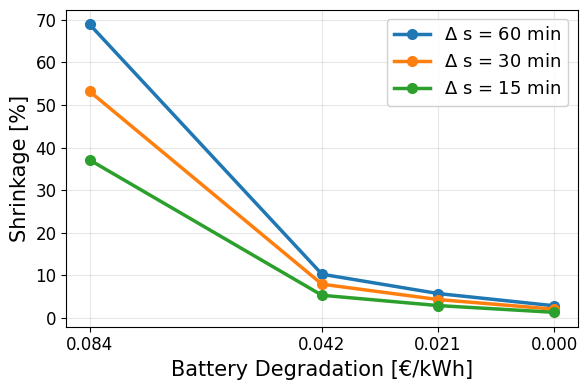

In [31]:
import matplotlib.pyplot as plt


def plot_shrinkage(shrinkage_df):
    """
    Plot shrinkage vs Z value for different XX values.
    Paper-ready version with reversed x-axis.
    """
    # Parse the config to extract XX and Z values
    plot_data = {}
    z_values = [0.084, 0.042, 0.021, 0]
    for i, config in enumerate(shrinkage_df.index):
        # Extract XX and Z from config like "mref60_c4"
        parts = config.split('_')
        xx = int(parts[0].replace('mref', ''))
        z = int(parts[1].replace('c', '')) * 0.01
        if z == 0.08:
            z = 0.084  # Adjust for the specific case of c8
        elif z == 0.04:
            z = 0.042  # Adjust for the specific case of c4
        elif z == 0.02:
            z = 0.021  # Adjust for the specific case of c2
        
        if xx not in plot_data:
            plot_data[xx] = {'z': [], 'shrinkage': []}
        
        plot_data[xx]['z'].append(z)
        plot_data[xx]['shrinkage'].append(shrinkage_df.loc[config, 'shrinkage_percent'])
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    
    for xx in sorted(plot_data.keys(), reverse=True):  # 60, 30, 15
        # Sort by Z value for proper line connection
        z_vals = plot_data[xx]['z']
        shrinkage_vals = plot_data[xx]['shrinkage']
        sorted_pairs = sorted(zip(z_vals, shrinkage_vals), reverse=True)
        z_sorted, shrinkage_sorted = zip(*sorted_pairs)
        
        ax.plot(z_sorted, shrinkage_sorted, marker='o', linewidth=2.5, 
                markersize=7, label=rf"$\Delta$ s = {xx} min")
    
    ax.set_xlabel('Battery Degradation [€/kWh]', fontsize=15)
    ax.set_ylabel('Shrinkage [%]', fontsize=15)
    ax.legend(fontsize=13, framealpha=0.9)
    ax.grid(True, alpha=0.3, linewidth=0.8)
    ax.set_xticks([0.084, 0.042, 0.021, 0])
    ax.tick_params(axis='both', labelsize=12)
    
    # Reverse x-axis
    ax.invert_xaxis()
    
    plt.tight_layout()
    #plt.savefig('shrinkage_battery_deg.pdf', bbox_inches='tight')
    plt.show()


# Call the function
plot_shrinkage(shrinkage_df)
